Imports des utilitaires pour le nettoyages de données

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import cv2

import os

import random

from datetime import datetime

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

sns.set_theme (style = "whitegrid", palette= "pastel")

Imports des données

In [1]:
test = pd.read_csv("X_test_update.csv", sep = ',')
train = pd.read_csv("X_train_update.csv", sep = ',')

Merge des colonnes designation et description dans une nouvelles colonnes "merges"

In [2]:
test_merge = test


# Fusion des colonnes 'designation' et 'description'
test_merge['merged'] = pd.concat([
    test_merge['designation'].fillna(''), 
    test_merge['description'].fillna('')
], axis=1).apply(' '.join, axis=1)

# Nettoyage des espaces inutiles dans la colonne fusionnée
test_merge['merged'] = test_merge['merged'].str.strip()

# Suppression des doublons en fonction de la colonne fusionnée
test_merge = test_merge.drop_duplicates(subset=['merged'])

test_merge = test_merge.drop(columns=['designation','description', "Unnamed: 0"])

# Résultat final
print(test_merge)

        productid     imageid  \
0       516376098  1019294171   
1       133389013  1274228667   
2      4128438366  1295960357   
3      3929899732  1265224052   
4       152993898   940543690   
...           ...         ...   
13807  3959381879  1269508019   
13808  1546314127  1308816290   
13809  2887191300  1169904062   
13810  4061586053  1283583872   
13811  4042554330  1280010121   

                                                  merged  
0      Folkmanis Puppets - 2732 - Marionnette Et Théâ...  
1      Porte Flamme Gaxix - Flamebringer Gaxix - 136/...  
2                      Pompe de filtration Speck Badu 95  
3      Robot de piscine électrique <p>Ce robot de pis...  
4      Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...  
...                                                  ...  
13807  Robe De Soutien De Sac De Soins De Les Suspend...  
13808          Livre De Phrases - Français ? Thaïlandais  
13809  Tifon1 200 M de Espa - Pompe piscine Tension (...  
13810  Christ

On vérifie ensuite s'il existe des doublons

In [3]:
# Vérifier si des doublons existent dans la colonne 'merged'
duplicates_exist = test_merge['merged'].duplicated().any()

# Afficher le résultat
if duplicates_exist:
    print("Il existe des doublons dans la colonne 'merged'.")
    # Afficher les lignes dupliquées
    print("Voici les doublons :")
    print(test_merge[test_merge['merged'].duplicated(keep=False)])
else:
    print("Aucun doublon trouvé dans la colonne 'merged'.")

Aucun doublon trouvé dans la colonne 'merged'.


Dans la colonnes "merged" on regarde la fréquence des mots 

In [4]:
from collections import Counter
import re

# Concaténer toutes les lignes de la colonne 'merged' dans une seule chaîne
all_text = " ".join(test_merge['merged'].dropna())

# Nettoyer le texte (enlever les caractères spéciaux, mettre en minuscule, etc.)
cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", all_text.lower())

# Diviser le texte en mots
words = cleaned_text.split()

# Calculer la fréquence des mots
word_counts = Counter(words)

# Afficher les 10 mots les plus fréquents
print("Les 10 mots les plus fréquents :")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

# Convertir en DataFrame pour une visualisation tabulaire si nécessaire
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Afficher les 10 premiers mots
print(word_counts_df.head(10))


Les 10 mots les plus fréquents :
de: 66419
la: 25523
et: 24938
pour: 16562
le: 15141
en: 15140
les: 12910
x: 12790
des: 9181
un: 8513
     Word  Frequency
19     de      66419
49     la      25523
4      et      24938
40   pour      16562
46     le      15141
87     en      15140
72    les      12910
131     x      12790
513   des       9181
33     un       8513


C:\Users\dunca\AppData\Local\Temp\ipykernel_40828\3367299643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


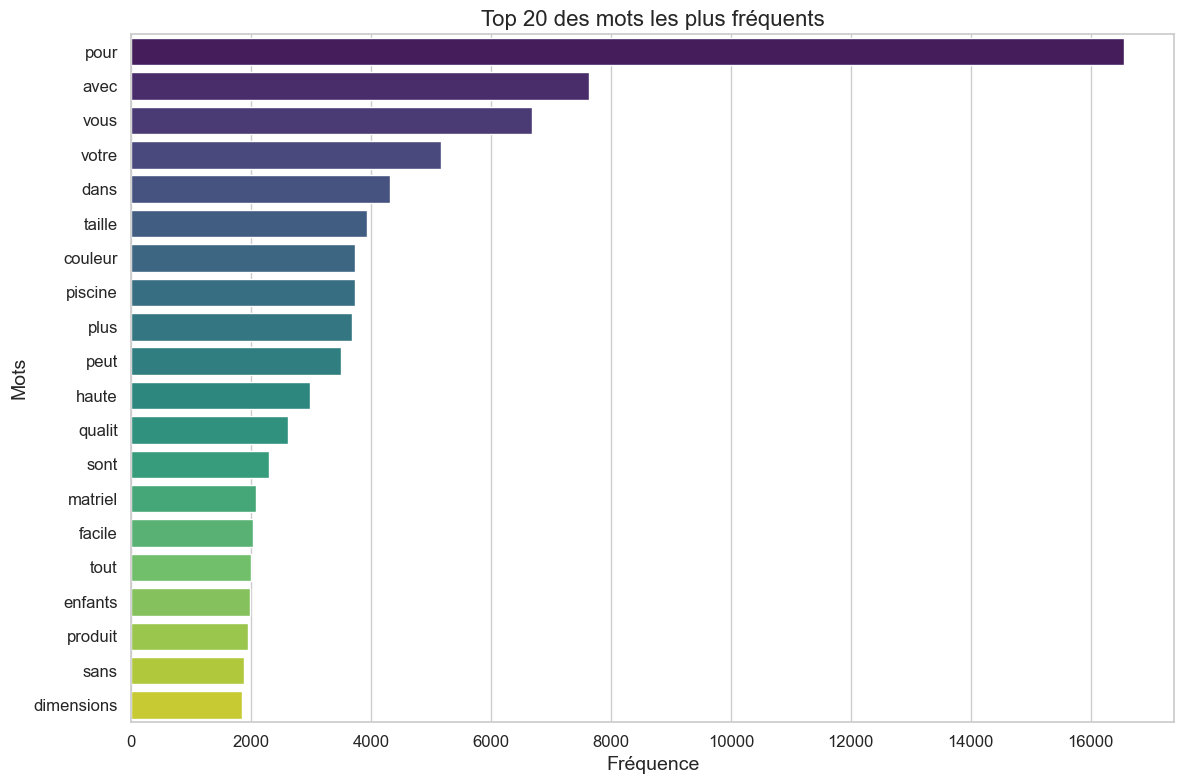

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les mots de plus de trois lettres
filtered_word_counts = word_counts_df[word_counts_df['Word'].str.len() > 3]

# Sélectionner les 20 mots les plus fréquents pour la visualisation
top_words = filtered_word_counts .head(20)

# Créer le graphique
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_words['Frequency'],
    y=top_words['Word'],
    palette="viridis"
)

# Ajouter des titres et des étiquettes
plt.title("Top 20 des mots les plus fréquents", fontsize=16)
plt.xlabel("Fréquence", fontsize=14)
plt.ylabel("Mots", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Afficher le graphique
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dunca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\dunca\AppData\Local\Temp\ipykernel_40828\2333142485.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


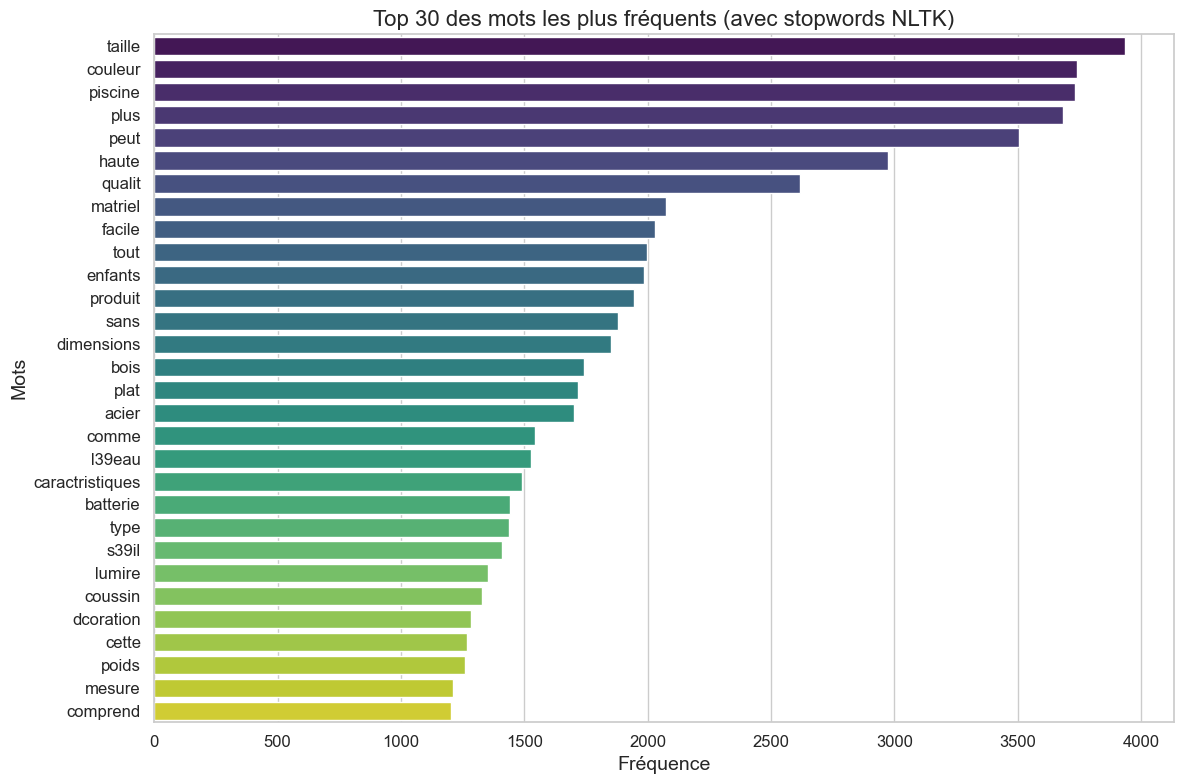

In [10]:
import nltk
from nltk.corpus import stopwords

# Télécharger les stopwords français
nltk.download('stopwords')

# Charger la liste des stopwords en français
nltk_stopwords = set(stopwords.words('french'))

# Ajouter vos propres mots à exclure si nécessaire
custom_stopwords = {"le", "la", "pour", "des", "du", "une", "les", "sur", "un", "de"}
all_stopwords = nltk_stopwords.union(custom_stopwords)

# Filtrer les mots de plus de trois lettres et exclure tous les stopwords
filtered_word_counts = word_counts_df[
    (word_counts_df['Word'].str.len() > 3) & 
    (~word_counts_df['Word'].isin(all_stopwords))
]

# Sélectionner les 20 mots les plus fréquents parmi les mots filtrés
top_filtered_words = filtered_word_counts.head(30)

# Créer le graphique
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_filtered_words['Frequency'],
    y=top_filtered_words['Word'],
    palette="viridis"
)

# Ajouter des titres et des étiquettes
plt.title("Top 30 des mots les plus fréquents (avec stopwords NLTK)", fontsize=16)
plt.xlabel("Fréquence", fontsize=14)
plt.ylabel("Mots", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Afficher le graphique
plt.show()
